In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import math

df = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/bike_rentals.csv", sep=";");

#Analysis
#Are there any missing values?
df.info()
df.isna().sum()
#There are no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        7689 non-null   int64  
 1   hour        7689 non-null   int64  
 2   season      7689 non-null   object 
 3   holiday     7689 non-null   object 
 4   workingday  7689 non-null   int64  
 5   weather     7689 non-null   object 
 6   temp        7689 non-null   float64
 7   atemp       7689 non-null   float64
 8   humidity    7689 non-null   int64  
 9   windspeed   7689 non-null   float64
 10  count       7689 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 660.9+ KB


,0
year,0
hour,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0


In [2]:
# Regardless of your answer above, would missing values be a problem for clustering? Why or why not?

#Yes, missing values would be a problem for clustering because they can interfere with distance calculations. For example: K-Means calculates the distance
#between data points and cluster centroids and if values are missing, these distances can't be computed properly. In addition, if missing values are filled in with zeros or the mean, it can introduce bias or distort the structure of data.

In [3]:
#Which columns contain continuous values? For these columns, use describe() to show basic summary statistics about them.

#The temp, atemp, windspeed, and count contain continuous values. The humidity column itself can also be considered continuous
# Humidity is measured as a percentage (0–100%), and in real life, it can take on any value within that range (like 62.3%, 62.7%, etc.). Even if your dataset only records whole numbers (e.g., 62, 63), it's still a measured quantity, not a category.
continuous_cols=['temp','atemp','humidity','windspeed','count']
df[continuous_cols].describe()


,temp,atemp,humidity,windspeed,count
count,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,20.267085,23.696581,61.771492,12.802070,191.419430
std,7.824066,8.514199,19.302151,8.178889,182.140265
min,0.820000,0.760000,0.000000,0.000000,1.000000
25%,13.940000,16.665000,46.000000,7.001500,41.000000
50%,20.500000,24.240000,62.000000,12.998000,145.000000
75%,26.240000,31.060000,77.000000,16.997900,283.000000
max,41.000000,45.455000,100.000000,56.996900,977.000000


In [4]:
#Which columns contain categorical values? Use value counts() to show the unique values contained
#in each column, and how often they appear.

#The season, year, hour, holiday, working day and weather columns contain categorical values.
categorical_cols=['season','year','hour','holiday','workingday','weather']
for col in categorical_cols:
    print(df[col].value_counts())

season
summer    1943
autumn    1925
spring    1920
winter    1901
Name: count, dtype: int64
year
2011    3879
2012    3810
Name: count, dtype: int64
hour
17    343
11    335
1     333
14    332
6     329
23    328
22    326
19    326
10    326
12    325
16    323
2     320
13    319
20    319
18    318
5     316
8     313
15    313
7     312
4     311
21    310
0     309
3     303
9     300
Name: count, dtype: int64
holiday
no     7466
yes     223
Name: count, dtype: int64
workingday
1    5208
0    2481
Name: count, dtype: int64
weather
good        5122
moderate    1981
bad          586
Name: count, dtype: int64


In [ ]:
#Of the categorical columns, which contain binary yes/no values? What do the yes/no values mean?

#The holiday and working day columns contain binary yes/no values.

#In the holiday column, the yes/no values indicate whether a given rental period falls on a public holiday or not.
#In the working day column, the 1/0 represent whether or not the day is a working day or not(holiday/weekend).



In [ ]:
#Perform any steps necessary to preprocess the dataset to prepare it for clustering. This could include one-hot
#encoding, producing binary 0/1 values, or standardizing with Z-score normalization.
#Please note that, if you want to perform one-hot encoding on the “year” column, you must transform it
#to a string first: df['year'] = df['year'].astype(str)


In [5]:
# Convert 'year' column to string type
df['year'] = df['year'].astype(str)

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['season', 'year', 'hour', 'holiday', 'workingday', 'weather'], drop_first=True)

# Standardize continuous columns using Z-score normalization
continuous_cols=['temp','atemp','humidity','windspeed','count']
for col in continuous_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()


In [5]:
from sklearn.cluster import KMeans

#K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0)
df['cluster'] = kmeans.fit_predict(df)

#1. Number of rows in each cluster
print(df['cluster'].value_counts())

#The first cluster has 3853 rows and the second one has 3836 rows.

#2.Average all columns within each cluster. Using these averages, find a cluster with the least
#bike rentals and a cluster with the most bike rentals, then describe them. Why do you think fewer
#people are renting bikes in the least-rented cluster?

#The first cluster, cluster 0 has the least bike rentals. The second cluster, cluster 1 has the most rentals.

# Average values for each column within each cluster
cluster_averages = df.groupby('cluster').mean()
print(cluster_averages)

# Find clusters with least and most bike rentals
least_rented_cluster = cluster_averages['count'].idxmin()
most_rented_cluster = cluster_averages['count'].idxmax()

print(f"\nCluster with least bike rentals: {least_rented_cluster}")
print(cluster_averages.loc[least_rented_cluster])

print(f"\nCluster with most bike rentals: {most_rented_cluster}")
print(cluster_averages.loc[most_rented_cluster])

# Plotting (example: temperature vs. count)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='count', hue='cluster', data=df, palette='viridis')
plt.title('K-means Clustering (K=2)')
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals')
plt.show()


ValueError: could not convert string to float: 'summer'

In [ ]:
# K-means clustering with K=3

cluster
1    2903
2    2493
0    2293
Name: count, dtype: int64
             temp     atemp  humidity  windspeed     count  season_spring  \
cluster                                                                     
0        0.956970  0.946067 -0.647247   0.218469  1.001845       0.361099   
1       -1.013694 -1.018067 -0.243399   0.204077 -0.392432       0.090596   
2        0.300210  0.315330  0.878750  -0.438582 -0.464501       0.332531   

         season_summer  season_winter  year_2012    hour_1  ...   hour_18  \
cluster                                                     ...             
0             0.448757       0.057567   0.584387  0.003053  ...  0.081553   
1             0.002067       0.564588   0.462280  0.047882  ...  0.035136   
2             0.364220       0.052146   0.452467  0.075010  ...  0.011633   

          hour_19   hour_20   hour_21   hour_22   hour_23  holiday_yes  \
cluster                                                                  
0        0.07588

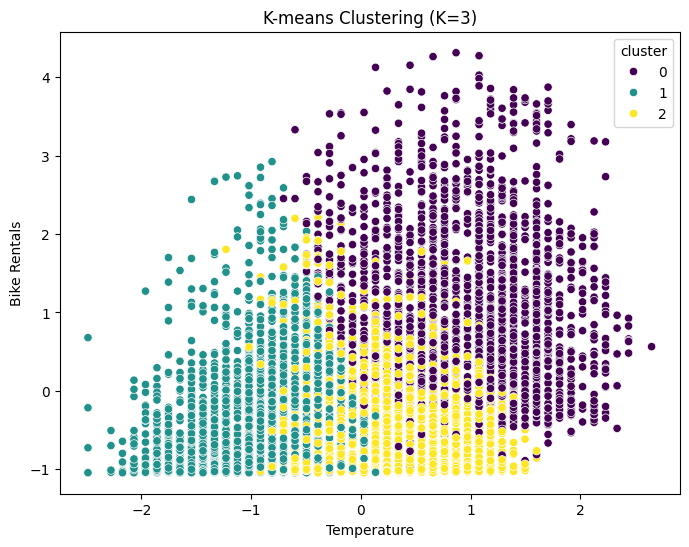

In [12]:
# prompt: perform k means clustering on the data with k=3 and plot

# K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df)

# 1. Number of rows in each cluster
print(df['cluster'].value_counts())

# Average all columns within each cluster. Using these averages, find a cluster with the least
#bike rentals and a cluster with the most bike rentals, then describe them. Why do you think fewer
#people are renting bikes in the least-rented cluster?

cluster_averages = df.groupby('cluster').mean()
print(cluster_averages)

# Find clusters with the least and most bike rentals
least_rented_cluster = cluster_averages['count'].idxmin()
most_rented_cluster = cluster_averages['count'].idxmax()

print(f"\nCluster with least bike rentals: {least_rented_cluster}")
print(cluster_averages.loc[least_rented_cluster])

print(f"\nCluster with most bike rentals: {most_rented_cluster}")
print(cluster_averages.loc[most_rented_cluster])

# Plotting (example: temperature vs. count)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='count', hue='cluster', data=df, palette='viridis')
plt.title('K-means Clustering (K=3)')
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals')
plt.show()


In [ ]:
# Based on what you’ve seen so far, which value of K (K=2 or K=3) provides more useful insight into bike rental patterns? Why?

#K=2 clustering divides bike rental data into two groups: low rentals during cold or poor weather and high rentals during warm or good weather, offering a basic seasonal or weather-based view.
#K=3 clustering, however, breaks the data into three groups: lowest rentals (cold/low-demand periods), moderate rentals (likely tied to commute times), and highest rentals (during warm weather or recreational periods).
# K=3 provides a more detailed and actionable understanding of rental patterns, including both weather and usage types like commuting and recreation.

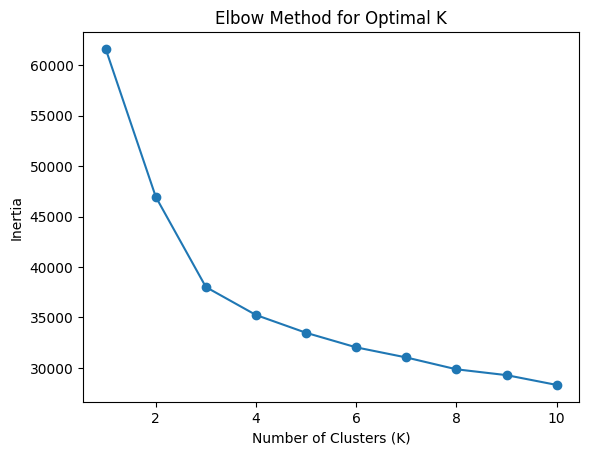

In [13]:
# #Use the elbow method with inertia scores to approximate an ideal value of K.

# Calculate inertia scores for different values of K
inertia_scores = []
for k in range(1, 11):  # Test K values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertia_scores.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
#Based on the graph, the ideal value of K is 3. This is because the intertia decreases rapidly from k=1 to k=3, and then around k=3, the line starts to bend and forms an elbow shape

In [4]:
#perform a K-means clustering with this value of K you discovered (6 points). Answer the following questions:

# K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df)

# 1. Number of rows in each cluster
print(df['cluster'].value_counts())

# Average all columns within each cluster. Using these averages, find a cluster with the least
#bike rentals and a cluster with the most bike rentals, then describe them. Why do you think fewer
#people are renting bikes in the least-rented cluster?

cluster_averages = df.groupby('cluster').mean()
print(cluster_averages)

# Find clusters with the least and most bike rentals
least_rented_cluster = cluster_averages['count'].idxmin()
most_rented_cluster = cluster_averages['count'].idxmax()

print(f"\nCluster with least bike rentals: {least_rented_cluster}")
print(cluster_averages.loc[least_rented_cluster])

print(f"\nCluster with most bike rentals: {most_rented_cluster}")
print(cluster_averages.loc[most_rented_cluster])

# Plotting (example: temperature vs. count)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='count', hue='cluster', data=df, palette='viridis')
plt.title('K-means Clustering (K=3)')
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals')
plt.show()

NameError: name 'KMeans' is not defined